# ♻️ **Analysis of Waste Recycling in Hong Kong**

### **Notebook Content**

- Questions / objectives

- Review of related works

- Introduction to data sources

- Data exploration

  - Preliminary

  - Data exploration and visulization

- Green Proposal



## **Questions / objectives**

**1. Which issue do we want to cover in this project?**

Since 1986, Hong Kong's population has grown by more than a million people, and everyone is throwing away more waste. Unfortunately, not all individuals are following the rules for proper waste disposal. We are going to explore the amount of waste in Hong Kong in the past years and the data of recyclable collection points.

**Our goal is to assist public to increase the awareness of garbage recycling, to promote waste recovery and recycling, as well as to promote the maintenance of the public's good and comfortable living environment.**

**2. What is the _`problem`_ we can identify?**

In this analysis, we will try to propose more possible or practical waste recycling points setting methods, assisting the government to increase the overall recycling rate, by exploring the population data and the distribution of recyclable collection points in different dirtricts of Hong Kong.

**3. What is our _`motivation`_ to do this project?**

When walking on the streets in Hong Kong, we can always notice a kind of phenomena like this: piles of excessive garbage surrounding a garbage can, and and even the presence of large items, such as discarded furniture, that shouldn't be there. These phenomenas remind us that some people still do not recognize how serious the waste is in Hong Kong, as well as the lack of awareness of waste recycling, and targeted waste disposal.

##**Review of related works**

**Source 1:**[Disscuss the introduction of Municipal Solid Waste charging scheme in Hong Kong](https://www.frontiersin.org/articles/10.3389/fenvs.2022.919683/full)

This article introduces several cities similar to Hong Kong, such as Seoul and Taipei, which have improved Municipal Solid Waste management through the implementation of charging schemes. Based on these examples, the article explores whether Hong Kong could also implement a similar strategy. It conducts research on the conditions for implementing such a policy in Hong Kong, providing a reference for the future establishment of relevant policies.

**Source 2:**[What can be recycled](https://ismwaste.co.uk/recycling-services/types-of-recycling)

From the referenced website, it's evident that numerous types of waste can be recycled. Leveraging this information, we may contemplate potential strategies to enhance the recycling conditions in Hong Kong.

##**Introduction to Data sources**



1. **Solid Waste Recovery** : the quantity of municipal waste disposed in Hong Kong from 2009 to 2021.

2. **Solid Waste Generation** : the quantity of municipal waste generated in Hong Kong from 2009 to 2021.

3. **Solid Waste by District** : the distribution of various types of waste across different districts.

4. **HK Population** : the population of different districts of Hong Kong in 2021.

5. **Waste Colletion Points** : the distribution of waste collection points across different districts in Hong Kong, mainly includes the location and waste type of each collection points.

**Source:**

Data government HK: https://data.gov.hk/en/

Waste Reduction Website: https://www.wastereduction.gov.hk/en-hk

## 📊 **Data exploration**

###**Part 1: Preliminary**

In this section, we imported, examined, processed the data and get ready for analysis, including:

1. Import libraries

2. Read the data and map

3. Examine attributes & Case selection

4. Basic statistics

#### Import libraries

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import DualMap

#### Read the data and map

In [ ]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [ ]:
pd.options.display.float_format = '{:.2f}'.format #control the data format in float

In [ ]:
# read the data of solid waste generation
waste_generation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/solid-waste-generation.csv')
waste_generation.head()

,year,waste_cat_en,generation_q
0,2009,Municipal solid waste,6452600
1,2010,Municipal solid waste,6930100
2,2011,Municipal solid waste,6302800
3,2012,Municipal solid waste,5558500
4,2013,Municipal solid waste,5493200


In [ ]:
# read the data of solid waste recovery
waste_recovery = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/solid-waste-recovery.csv')
waste_recovery.head()

,year,waste_cat_en,recovery_q
0,2009,Municipal solid waste,3181300
1,2010,Municipal solid waste,3603400
2,2011,Municipal solid waste,3019300
3,2012,Municipal solid waste,2162800
4,2013,Municipal solid waste,2008700


In [ ]:
# read the data of waste in different distrcit
waste_district = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Amount of waste in each district.csv')
waste_district.head()

,district_id,Household waste,Commercial and industrial waste,Municipal solid waste,Building waste,All wastes
0,Kwai_Tsing,346,489,835,230,1900
1,North,343,508,851,215,1917
2,Sai_Kung,366,49,415,727,1557
3,Sha_Tin,516,444,960,118,2038
4,Tai_Po,326,139,465,165,1095


In [ ]:
# read the data of population
population = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/HKpopulation.csv')
population.head()

,Name of District Council district (in English),Total population
0,Central and Western,"235,953.00"
1,Eastern,"529,603.00"
2,Islands,"185,282.00"
3,Kowloon City,"410,634.00"
4,Kwai Tsing,"495,798.00"


In [ ]:
# read the data of wasteless
wasteless = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wasteless07.csv')
wasteless.head()

,cp_id,cp_state,district_id,address_en,address2_en,address_tc,address_sc,lat,lgt,waste_type,legend,accessibilty_notes,contact_en,contact_tc,contact_sc,openhour_en,openhour_tc,openhour_sc
0,283,Accepted,Kwai_Tsing,Kwai Hing Road near Kwai Hing MTR Station,NaN,葵興路近港鐵葵興站,葵兴路近港铁葵兴站,22.36,114.13,"Metals,Other Plastic,Paper",Recycling Bins at Public Place,Note: For public use,NaN,NaN,NaN,NaN,NaN,NaN
1,286,Accepted,Kwai_Tsing,Wing Shun Street near Tsuen Wan Abattoir,NaN,永順街近荃灣屠場,永顺街近荃湾屠场,22.36,114.11,"Metals,Other Plastic,Paper",Recycling Bins at Public Place,Note: For public use,NaN,NaN,NaN,NaN,NaN,NaN
2,288,Accepted,Kwai_Tsing,Tai Wong Ha Resite Village RCP,NaN,大王下村垃圾收集站,大王下村垃圾收集站,22.35,114.10,"Metals,Other Plastic,Paper",Recycling Bins at Public Place,Note: For public use,NaN,NaN,NaN,NaN,NaN,NaN
3,289,Accepted,Kwai_Tsing,Chung Mei Lo Uk Village RCP,NaN,涌美垃圾收集站 - 新界青衣上高灘街涌美垃圾收集站,涌美垃圾收集站 - 新界青衣上高滩街涌美垃圾收集站,22.35,114.11,"Glass Bottles,Metals,Other Plastic,Paper",Recycling Bins at Public Place,Note: For public use,NaN,NaN,NaN,NaN,NaN,NaN
4,293,Accepted,Kwai_Tsing,Entrance to Tsing Fai San Tsuen Village RCP at...,NaN,丈量約份第434約地段第817-865號青輝新村垃圾收集站 (近入口),丈量约份第434约地段第817-865号青辉新村垃圾收集站 (近入口),22.35,114.10,"Glass Bottles,Metals,Other Plastic,Paper",Recycling Bins at Public Place,Note: For public use,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Get a map json file
hk_geo = '/content/drive/MyDrive/Colab Notebooks/data/hkg_adm1.geojson'

#### Examine attributes & Case selection

In this step, we gain an overview of our data tables and form an understanding of their structures.

Besides, we rename some of the table column titles and extract the columns that we will need for use in later steps.

##### <font color = '#0969DA'>**Table 1:** </font>Waste Generation

In [ ]:
waste_generation.shape

(13, 3)

In [ ]:
waste_generation.columns

Index(['year', 'waste_cat_en', 'generation_q'], dtype='object')

In [ ]:
waste_generation.index

RangeIndex(start=0, stop=13, step=1)

In [ ]:
waste_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          13 non-null     int64 
 1   waste_cat_en  13 non-null     object
 2   generation_q  13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 440.0+ bytes


In [ ]:
new_columns = {'waste_cat_en':'Waste','generation_q':'Generation','year':'Year'}

waste_generation = waste_generation.rename(columns = new_columns)

waste_generation

,Year,Waste,Generation
0,2009,Municipal solid waste,6452600
1,2010,Municipal solid waste,6930100
2,2011,Municipal solid waste,6302800
3,2012,Municipal solid waste,5558500
4,2013,Municipal solid waste,5493200
5,2014,Municipal solid waste,5623600
6,2015,Municipal solid waste,5740700
7,2016,Municipal solid waste,5698800
8,2017,Municipal solid waste,5748200
9,2018,Municipal solid waste,5948700


##### <font color = '#0969DA'>**Table 2:** </font>: Waste Recovery

In [ ]:
waste_recovery.shape

(13, 3)

In [ ]:
waste_recovery.columns

Index(['year', 'waste_cat_en', 'recovery_q'], dtype='object')

In [ ]:
waste_recovery.index

RangeIndex(start=0, stop=13, step=1)

In [ ]:
waste_recovery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          13 non-null     int64 
 1   waste_cat_en  13 non-null     object
 2   recovery_q    13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 440.0+ bytes


In [ ]:
new_columns = {'waste_cat_en':'Waste','recovery_q':'Recovery','year':'Year'}

waste_recovery = waste_recovery.rename(columns = new_columns)

waste_recovery

,Year,Waste,Recovery
0,2009,Municipal solid waste,3181300
1,2010,Municipal solid waste,3603400
2,2011,Municipal solid waste,3019300
3,2012,Municipal solid waste,2162800
4,2013,Municipal solid waste,2008700
5,2014,Municipal solid waste,2053200
6,2015,Municipal solid waste,2032800
7,2016,Municipal solid waste,1912300
8,2017,Municipal solid waste,1830600
9,2018,Municipal solid waste,1777600


##### <font color = '#0969DA'>**Table 3:** </font> Solid Waste by District

In [ ]:
waste_district.shape

(18, 6)

In [ ]:
waste_district.columns

Index(['district_id', 'Household waste', 'Commercial and industrial waste',
       'Municipal solid waste', 'Building waste', 'All wastes'],
      dtype='object')

In [ ]:
waste_district.index

RangeIndex(start=0, stop=18, step=1)

In [ ]:
waste_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   district_id                      18 non-null     object
 1   Household waste                  18 non-null     int64 
 2   Commercial and industrial waste  18 non-null     int64 
 3   Municipal solid waste            18 non-null     int64 
 4   Building waste                   18 non-null     int64 
 5   All wastes                       18 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 992.0+ bytes


In [ ]:
new_columns = {'district_id':'District',}

waste_district = waste_district.rename(columns = new_columns)
#waste_district = waste_district.drop('All wastes', axis=1)
waste_district

,District,Household waste,Commercial and industrial waste,Municipal solid waste,Building waste,All wastes
0,Kwai_Tsing,346,489,835,230,1900
1,North,343,508,851,215,1917
2,Sai_Kung,366,49,415,727,1557
3,Sha_Tin,516,444,960,118,2038
4,Tai_Po,326,139,465,165,1095
5,Tsuen_Wan,244,208,452,37,941
6,Tuen_Mun,507,328,835,605,2275
7,Yuen_Long,747,638,1385,90,2860
8,Central_Western,271,211,482,97,1061
9,Eastern,459,99,558,85,1201


##### <font color = '#0969DA'>**Table 4:** </font>Population by District

In [ ]:
population.shape

(19, 2)

In [ ]:
population.columns

Index(['Name of District Council district (in English)', ' Total population '], dtype='object')

In [ ]:
population.index

RangeIndex(start=0, stop=19, step=1)

In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Name of District Council district (in English)  19 non-null     object
 1    Total population                               19 non-null     object
dtypes: object(2)
memory usage: 432.0+ bytes


In [ ]:
# precess the population table
new_columns = {'Name of District Council district (in English)':'District',
               ' Total population ':'Population2021'}

#drop the total raw
population = population.rename(columns = new_columns).drop(18)

population

,District,Population2021
0,Central and Western,"235,953.00"
1,Eastern,"529,603.00"
2,Islands,"185,282.00"
3,Kowloon City,"410,634.00"
4,Kwai Tsing,"495,798.00"
5,Kwun Tong,"673,166.00"
6,North,"309,631.00"
7,Sai Kung,"489,037.00"
8,Sha Tin,"692,806.00"
9,Sham Shui Po,"431,090.00"


##### <font color = '#0969DA'>**Table 5:** </font> Waste Colletion Points

In [ ]:
wasteless.shape

(6520, 18)

In [ ]:
wasteless.columns

Index(['cp_id', 'cp_state', 'district_id', 'address_en', 'address2_en',
       'address_tc', 'address_sc', 'lat', 'lgt', 'waste_type', 'legend',
       'accessibilty_notes', 'contact_en', 'contact_tc', 'contact_sc',
       'openhour_en', 'openhour_tc', 'openhour_sc'],
      dtype='object')

In [ ]:
wasteless.index

RangeIndex(start=0, stop=6520, step=1)

In [ ]:
wasteless.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6520 entries, 0 to 6519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cp_id               6520 non-null   int64  
 1   cp_state            6520 non-null   object 
 2   district_id         6520 non-null   object 
 3   address_en          6520 non-null   object 
 4   address2_en         376 non-null    object 
 5   address_tc          6520 non-null   object 
 6   address_sc          6520 non-null   object 
 7   lat                 6520 non-null   float64
 8   lgt                 6520 non-null   float64
 9   waste_type          6520 non-null   object 
 10  legend              6515 non-null   object 
 11  accessibilty_notes  6515 non-null   object 
 12  contact_en          908 non-null    object 
 13  contact_tc          415 non-null    object 
 14  contact_sc          415 non-null    object 
 15  openhour_en         426 non-null    object 
 16  openho

In [ ]:
# select the columns for analysis
wasteless = wasteless.iloc[:,[0,2,3,9,10,11]]

wasteless.head()

,cp_id,district_id,address_en,waste_type,legend,accessibilty_notes
0,283,Kwai_Tsing,Kwai Hing Road near Kwai Hing MTR Station,"Metals,Other Plastic,Paper",Recycling Bins at Public Place,Note: For public use
1,286,Kwai_Tsing,Wing Shun Street near Tsuen Wan Abattoir,"Metals,Other Plastic,Paper",Recycling Bins at Public Place,Note: For public use
2,288,Kwai_Tsing,Tai Wong Ha Resite Village RCP,"Metals,Other Plastic,Paper",Recycling Bins at Public Place,Note: For public use
3,289,Kwai_Tsing,Chung Mei Lo Uk Village RCP,"Glass Bottles,Metals,Other Plastic,Paper",Recycling Bins at Public Place,Note: For public use
4,293,Kwai_Tsing,Entrance to Tsing Fai San Tsuen Village RCP at...,"Glass Bottles,Metals,Other Plastic,Paper",Recycling Bins at Public Place,Note: For public use


#### <font color = 'red'> Basic statistics

In this step, we use describe function to provide a statistical summary of the data including count, mean, standard deviation, minimum, 25%, 50% and 75% quantiles, and maximum values.

Basic statistics-Waster Generation

In [ ]:
waste_generation.describe()

,Year,Generation
count,13.00,13.00
mean,2015.00,5896315.38
std,3.89,428334.42
min,2009.00,5493200.00
25%,2012.00,5623600.00
50%,2015.00,5740700.00
75%,2018.00,5986500.00
max,2021.00,6930100.00


#####Basic statistics-Waster Recovery

In [ ]:
waste_recovery.describe()

,Year,Recovery
count,13.00,13.00
mean,2015.00,2199969.23
std,3.89,643634.46
min,2009.00,1537700.00
25%,2012.00,1830600.00
50%,2015.00,2008700.00
75%,2018.00,2162800.00
max,2021.00,3603400.00


#####Basic statistics-Waster In Different Distrcit

In [ ]:
waste_district.describe()

,Household waste,Commercial and industrial waste,Municipal solid waste,Building waste,All wastes
count,18.00,18.00,18.00,18.00,18.00
mean,380.28,220.33,600.61,189.94,1391.17
std,148.41,185.25,297.75,182.47,634.83
min,178.00,38.00,216.00,37.00,547.00
25%,280.50,81.25,398.50,91.75,929.75
50%,344.50,164.50,492.50,141.00,1171.50
75%,495.00,307.00,821.00,198.75,1852.50
max,747.00,638.00,1385.00,727.00,2860.00


#####Basic statistics-Hong Kong Population

In [ ]:
population.describe()

,District,Population2021
count,18,18
unique,18,18
top,Central and Western,"235,953.00"
freq,1,1


#####Basic statistics-Wasteless

In [ ]:
wasteless.describe()

,cp_id
count,6520.00
mean,6127.32
std,2995.82
min,283.00
25%,3614.75
50%,6652.50
75%,8516.25
max,10764.00


###**Part 2: Data exploration and visualization**

####**<font color ='Green'>Q1: What is the trend in the amount of municipal solid waste in Hong Kong, and what is the distribution of various types of waste in different districts？**

In this section, we will explore the changes in the generation of solid waste, the distribution of waste types across different districts, and the variations in the solid waste recycling ratios.

In [ ]:
Waste_generation_recovery = pd.merge(waste_generation,waste_recovery)
Waste_generation_recovery

,Year,Waste,Generation,Recovery
0,2009,Municipal solid waste,6452600,3181300
1,2010,Municipal solid waste,6930100,3603400
2,2011,Municipal solid waste,6302800,3019300
3,2012,Municipal solid waste,5558500,2162800
4,2013,Municipal solid waste,5493200,2008700
5,2014,Municipal solid waste,5623600,2053200
6,2015,Municipal solid waste,5740700,2032800
7,2016,Municipal solid waste,5698800,1912300
8,2017,Municipal solid waste,5748200,1830600
9,2018,Municipal solid waste,5948700,1777600


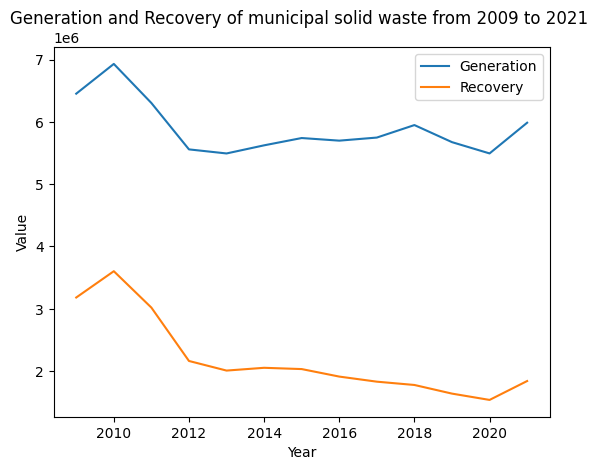

In [ ]:
ax=Waste_generation_recovery[['Year', 'Generation','Recovery']].plot(kind = 'line',
x = 'Year',
y=['Generation', 'Recovery'],
title = 'Generation and Recovery of municipal solid waste from 2009 to 2021 ',
legend = True)
ax.set_xlabel('Year')
ax.set_ylabel('Value')

plt.show()

<font color = 'green'>**Analysis:** </font>

The line chart presents a trend of decreasing total municipal solid waste generation from 2009 to 2021. However, it also illustrates a concurrent decline in waste recovery over the same period.

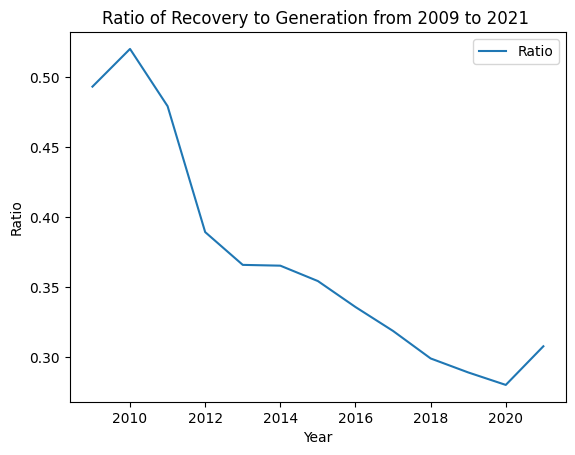

In [ ]:
Waste_generation_recovery['Ratio'] =Waste_generation_recovery['Recovery'] /Waste_generation_recovery['Generation']

ax = Waste_generation_recovery.plot(kind = 'line',
x = 'Year',
y='Ratio',
title = 'Ratio of Recovery to Generation from 2009 to 2021 ',
legend = True)

ax.set_xlabel('Year')
ax.set_ylabel('Ratio')

plt.show()

<font color = 'green'>**Analysis:** </font>

The line chart underscores a substantial decrease in the recycling ratio of solid waste from 2009 to 2021. The concurrent reduction in both the generation and recovery of municipal solid waste suggests a potential deficiency in public awareness about recycling. This situation emphasizes the need for more robust policies and infrastructure improvements to enhance recycling initiatives.

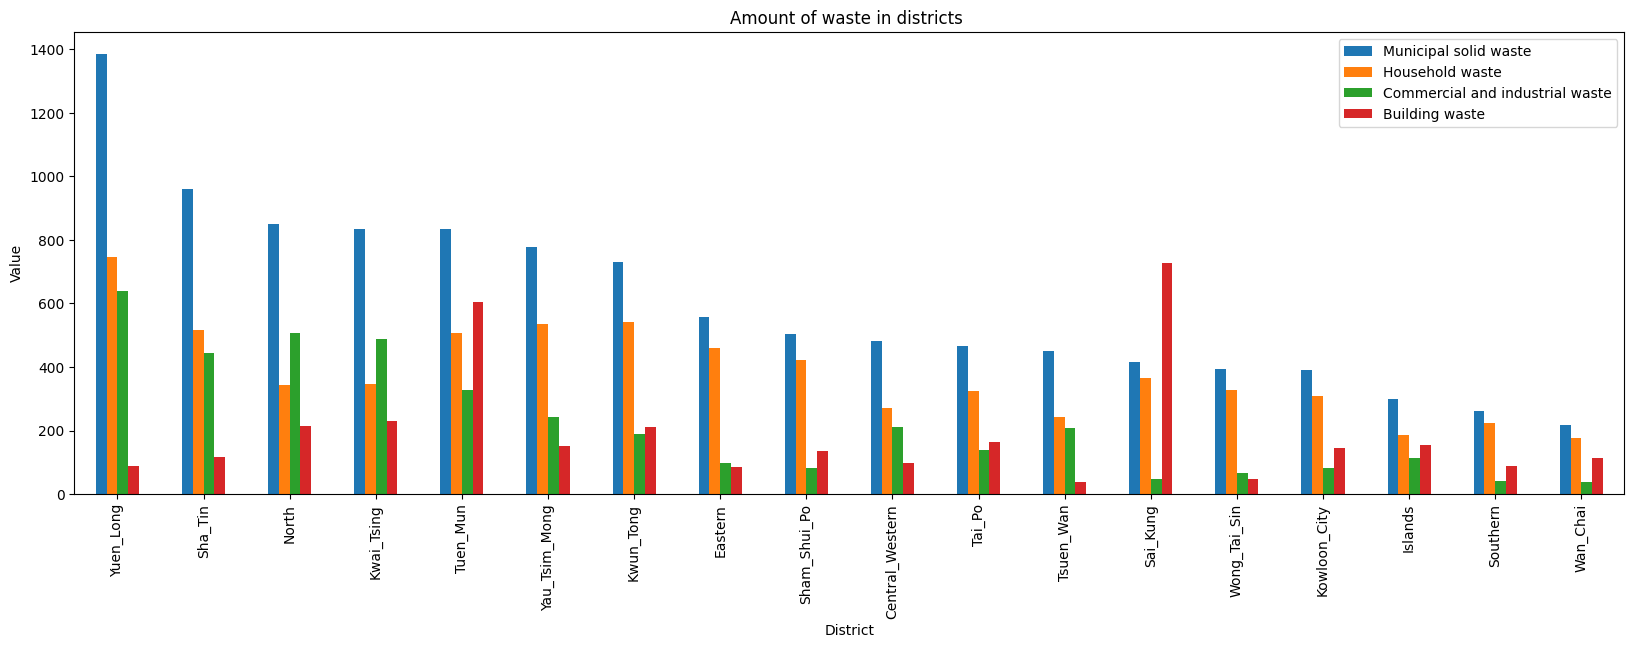

In [ ]:
sorted_data = waste_district[['District', 'Household waste', 'Commercial and industrial waste', 'Municipal solid waste', 'Building waste']].sort_values(by='Municipal solid waste', ascending=False)
ax = sorted_data.plot(kind='bar',
x = 'District',
y=['Municipal solid waste','Household waste','Commercial and industrial waste','Building waste'],
title = 'Amount of waste in districts ',
legend = True,
figsize=(20,6))
ax.set_xlabel('District')
ax.set_ylabel('Value')

plt.show()

<font color = 'green'>**Analysis:** </font>

The bar charts above shows that the distribution of differnt type in of wastes in different distrcits in Hong Kong. The bar charts clearly indicate that municipal solid waste is the primary waste category in Hong Kong's daily life. Thus, developing effective strategies for maximizing the recycling of municipal solid waste and enhancing the efficiency of these recycling processes is critical for environmental conservation in Hong Kong.


#### **<font color ='Green'>Q2: What is the difference between the distribution of Municipal solid waste and all wastes**
In this part, we study the distribution of urban solid waste and total waste in various districts, analyze the differences in map colors, and improve solutions.

In [ ]:
# adjust the district name
waste_district['District'] = waste_district['District'].replace({'Sha_Tin':'Sha Tin'})
waste_district['District'] = waste_district['District'].replace({'Kwai_Tsing': 'Kwai Tsing'})
waste_district['District'] = waste_district['District'].replace({'Tai_Po': 'Tai Po'})
waste_district['District'] = waste_district['District'].replace({'Sai_Kung': 'Sai Kung'})
waste_district['District'] = waste_district['District'].replace({'Tsuen_Wan': 'Tsuen Wan'})
waste_district['District'] = waste_district['District'].replace({'Tuen_Mun': 'Tuen Mun'})
waste_district['District'] = waste_district['District'].replace({'Yuen_Long': 'Yuen Long'})
waste_district['District'] = waste_district['District'].replace({'Central_Western': 'Central and Western'})
waste_district['District'] = waste_district['District'].replace({'Wan_Chai': 'Wan Chai'})
waste_district['District'] = waste_district['District'].replace({'Kowloon_City': 'Kowloon City'})
waste_district['District'] = waste_district['District'].replace({'Kwun_Tong': 'Kwun Tong'})
waste_district['District'] = waste_district['District'].replace({'Sham_Shui_Po': 'Sham Shui Po'})
waste_district['District'] = waste_district['District'].replace({'Wong_Tai_Sin': 'Wong Tai Sin'})
waste_district['District'] = waste_district['District'].replace({'Yau_Tsim_Mong': 'Yau Tsim Mong'})

In [ ]:
# keep the column that we need
data_cleaned = waste_district[['District', 'Municipal solid waste']].copy()

# save the new csv
data_cleaned.to_csv('cleaned_data.csv', index=False)

In [ ]:
# keep the column that we need
data_cleaned_all = waste_district[['District', 'All wastes']].copy()

# save the new csv
data_cleaned_all.to_csv('cleaned_data_all.csv', index=False)

In [ ]:
# check the needed data
print(data_cleaned_all)

               District  All wastes
0            Kwai Tsing        1900
1                 North        1917
2              Sai Kung        1557
3               Sha Tin        2038
4                Tai Po        1095
5             Tsuen Wan         941
6              Tuen Mun        2275
7             Yuen Long        2860
8   Central and Western        1061
9               Eastern        1201
10             Southern         614
11             Wan Chai         547
12              Islands         752
13         Kowloon City         926
14            Kwun Tong        1672
15         Sham Shui Po        1142
16         Wong Tai Sin         833
17        Yau Tsim Mong        1710


In [ ]:
# Create DualMap object
dual_map = DualMap(location=[22.38, 114.15], tiles='cartodbpositron', zoom_start=10)

# Add map_muni to the left map
left_map = dual_map.m1
choropleth_muni = folium.Choropleth(
    geo_data=hk_geo,
    name='choropleth',
    data=data_cleaned,
    columns=['District', 'Municipal solid waste'],
    key_on='feature.properties.name_1',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='The quanlity of Municipal solid waste',
    highlight=True
).add_to(left_map)
folium.TileLayer('openstreetmap').add_to(left_map)
folium.LayerControl().add_to(left_map)

# Add map_all to the right map
right_map = dual_map.m2
choropleth_all = folium.Choropleth(
    geo_data=hk_geo,
    name='choropleth',
    data=data_cleaned_all,
    columns=['District', 'All wastes'],
    key_on='feature.properties.name_1',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='The quanlity of all waste',
    highlight=True
).add_to(right_map)
folium.TileLayer('openstreetmap').add_to(right_map)
folium.LayerControl().add_to(right_map)

# display dual_map
dual_map

<font color = 'green'>**Analysis:** </font>

It is evident from the distribution of both municipal solid waste and all wastes in different regions that only the combined amount of waste in **Sai Kung** and **Yau Tsim Mong** exceeds the amount of municipal solid waste. In Hong Kong, it is possible to recycle municipal solid waste; nonetheless, the accumulation of waste in these two areas is a result of the incapacity to recycle garbage. Thus, we think that in addition to setting up a sufficient number of trash cans, we should assign more committed employees to these two regions to handle the leftover waste at designated locations.Reduce the burden of garbage volume.

####**<font color ='Green'>Q3: How about the waste collection points?**

In this section, we will study population distribution of Hong Kong and where recycling points are located. We want to figure out if the current arrangement of recycling points makes sense by calculating how many people share each recycling point in different areas.

##### <font color ='Green'>**1. What type of waste is the government recycling？**

In [1]:
df = wasteless.copy()

# split the waste_type column
df['waste_type'] = df['waste_type'].str.split(',')
df = df.explode('waste_type')

# count collection points by waste_type
# one collection point could collect several materials
count_by_type = df['waste_type'].value_counts().sort_values(ascending=True)

count_by_type.describe()

NameError: name 'wasteless' is not defined

In [ ]:
count_by_type.plot(
    kind = 'barh',
    figsize=(10, 6),
    color = 'green',
    subplots=True,
    legend = False)

plt.title('The number of collection points by waste type')
plt.xlabel('Number of collection points')
#plt.ylabel('Waste type')
plt.show()

<font color = 'green'>**Analysis:** </font>

The government has categorized recyclable waste into 16 types. Apart from Other Plastics, the top three materials that are commonly recycled are Metals, Paper, and Glass bottles. In Hong Kong, over 5000 Recycling Spots have been established to offer fixed-location collection services for recyclable Metals and Paper.


##### <font color ='Green'> **2. What is the regional distribution of collection points?**

In [ ]:
cpDist = wasteless.groupby(by = 'district_id')[['cp_id']].count().reset_index()

#rename the columns
newColumns = {'district_id':'District','cp_id':'cpNum'}
cpDist = cpDist.rename(columns = newColumns)

# adjust the district name
replace_dict = {
    'Central_Western': 'Central and Western',
    'Kowloon_City': 'Kowloon City',
    'Kwai_Tsing': 'Kwai Tsing',
    'Kwun_Tong': 'Kwun Tong',
    'Sham_Shui_Po': 'Sham Shui Po',
    'Wan_Chai': 'Wan Chai',
    'Wong_Tai_Sin': 'Wong Tai Sin',
    'Yau_Tsim_Mong': 'Yau Tsim Mong',
    'Sai_Kung':'Sai Kung',
    'Sha_Tin':'Sha Tin',
    'Tsuen_Wan':'Tsuen Wan',
    'Tuen_Mun':'Tuen Mun',
    'Yuen_Long':'Yuen Long',
    'Tai_Po':'Tai Po'}
cpDist['District'] = cpDist['District'].replace(replace_dict)

# add proportion column
total_cpNum = cpDist['cpNum'].sum()
cpDist['cp_proportion'] = cpDist['cpNum'] / total_cpNum

cpDist

,District,cpNum,cp_proportion
0,Central and Western,563,0.09
1,Eastern,409,0.06
2,Islands,294,0.05
3,Kowloon City,356,0.05
4,Kwai Tsing,246,0.04
5,Kwun Tong,285,0.04
6,North,399,0.06
7,Sai Kung,514,0.08
8,Sha Tin,428,0.07
9,Sham Shui Po,324,0.05


In [ ]:
cpDist.describe()

,cpNum,cp_proportion
count,18.00,18.00
mean,362.22,0.06
std,102.67,0.02
min,152.00,0.02
25%,295.75,0.05
50%,351.50,0.05
75%,407.00,0.06
max,563.00,0.09


In [ ]:
# map of collection points
map1 = folium.Map([22.38, 114.15], tiles='cartodbpositron', zoom_start=11)
tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']

for tile in tiles:
    folium.TileLayer(tile).add_to(map1)

choropleth = folium.Choropleth(
    geo_data = hk_geo,
    name = 'choropleth',
    data = cpDist,
    columns = ['District', 'cp_proportion'],
    key_on = 'feature.properties.name_1',
    fill_color = 'YlOrBr',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Collection Points Proportion (%) in 2021', # Collection Points Proportion in 2021
    highlight = True
).add_to(map1)

folium.LayerControl().add_to(map1)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name_1'], labels=False))

map1

<font color = 'green'>**Analysis:** </font>

On average, each district has more than 100 recycling collection points at least.Wong Tai Sin has the lowest number of just 152 collection points. Interestingly, the Central Western district has the highest number of recycling points. It appears that the government tends to prioritize establishing additional collection points in economic and political hubs to ensure the cleanliness of the city center.



#####**<font color ='Green'>3. How many people share a collection point in each district?**

In [ ]:
total_pop = population['Population2021'].sum()

population['pop_proportion'] = population['Population2021'] / total_pop
population

,District,Population2021,pop_proportion
0,Central and Western,235953,0.03
1,Eastern,529603,0.07
2,Islands,185282,0.02
3,Kowloon City,410634,0.06
4,Kwai Tsing,495798,0.07
5,Kwun Tong,673166,0.09
6,North,309631,0.04
7,Sai Kung,489037,0.07
8,Sha Tin,692806,0.09
9,Sham Shui Po,431090,0.06


In [ ]:
# merge two tables by District
mergedData = cpDist.merge(population,left_on='District',right_on='District')

# caculate how many people share a collection point
mergedData['popNum_per_cp'] = round(mergedData['Population2021'] /  mergedData['cpNum']).astype(int)

# add proportion column
total_num = mergedData['popNum_per_cp'].sum()
mergedData['proportion'] = mergedData['popNum_per_cp'] / total_num

mergedData

,District,cpNum,cp_proportion,Population2021,pop_proportion,popNum_per_cp,proportion
0,Central and Western,563,0.09,235953,0.03,419,0.02
1,Eastern,409,0.06,529603,0.07,1295,0.06
2,Islands,294,0.05,185282,0.02,630,0.03
3,Kowloon City,356,0.05,410634,0.06,1153,0.05
4,Kwai Tsing,246,0.04,495798,0.07,2015,0.09
5,Kwun Tong,285,0.04,673166,0.09,2362,0.11
6,North,399,0.06,309631,0.04,776,0.04
7,Sai Kung,514,0.08,489037,0.07,951,0.04
8,Sha Tin,428,0.07,692806,0.09,1619,0.07
9,Sham Shui Po,324,0.05,431090,0.06,1331,0.06


In [ ]:
mergedData.describe()

,cpNum,cp_proportion,Population2021,pop_proportion,popNum_per_cp,proportion
count,18.00,18.00,18.00,18.00,18.00,18.00
mean,362.22,0.06,411774.72,0.06,1227.61,0.06
std,102.67,0.02,163028.19,0.02,615.59,0.03
min,152.00,0.02,166695.00,0.02,419.00,0.02
25%,295.75,0.05,309885.00,0.04,802.75,0.04
50%,351.50,0.05,408718.00,0.06,1108.00,0.05
75%,407.00,0.06,504108.75,0.07,1346.75,0.06
max,563.00,0.09,692806.00,0.09,2676.00,0.12


In [ ]:
# The number of people sharing one collection point

#from geopy.geocoders import Nominatim

# Define the locations of each district
district_locations = {
    'Central and Western': (22.2795, 114.1549),
    'Eastern': (22.2731, 114.2360),
    'Southern': (22.2193, 114.2252),
    'Wan Chai': (22.2770, 114.1732),
    'Sham Shui Po': (22.3286, 114.1603),
    'Kowloon City': (22.3307, 114.1897),
    'Kwun Tong': (22.3129, 114.2256),
    'Wong Tai Sin': (22.3410, 114.1929),
    'Yau Tsim Mong': (22.3188, 114.1694),
    'Islands': (22.2628, 113.9655),
    'Kwai Tsing': (22.3549, 114.0844),
    'North': (22.4947, 114.1381),
    'Sai Kung': (22.3814, 114.2708),
    'Sha Tin': (22.3874, 114.1954),
    'Tai Po': (22.4494, 114.1718),
    'Tsuen Wan': (22.3707, 114.1049),
    'Tuen Mun': (22.3910, 113.9767),
    'Yuen Long': (22.4445, 114.0255),
}

# Create the map
map3 = folium.Map([22.38, 114.15], tiles='cartodbpositron', zoom_start=11)
tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']

for tile in tiles:
    folium.TileLayer(tile).add_to(map3)

choropleth = folium.Choropleth(
    geo_data = hk_geo,
    name = 'choropleth',
    data = mergedData,
    columns = ['District', 'proportion'],
    key_on = 'feature.properties.name_1',
    fill_color = 'YlGnBu',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'The number of people sharing one collection point',
    highlight = True
).add_to(map3)

# add the population and collection point number to the labels
for _, row in mergedData.iterrows():
    district = row['District']
    population = row['Population2021']
    cpNum = row['cpNum']
    popNum_per_cp = row['popNum_per_cp']

    latitude, longitude = district_locations.get(district, (None, None))

    label = f"Population: <b>{population}</b><br>Col Point Num: <b>{cpNum}</b><br>Shared by <b>{popNum_per_cp}</b> people"
    folium.Marker(location=[latitude,longitude], popup=label).add_to(map3)

folium.LayerControl().add_to(map3)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name_1'], labels=False))

map3

<font color = 'green'>**Analysis:** </font>

When it comes to recycling collection points per person, Wong Tai Sin, Kwun Tong, and Kwai Tsing are facing the biggest shortage. On average, **more than 2000** people have to share a single recycling collection point in these districts. In contrast, the Central and Western area has the highest abundance of recycling collection points, with only **419** people sharing one point. That's about **one-sixth** of the ratio in Wong Tai Sin.

For future urban planning, we suggest that the government should prioritize setting up more recycling points in these districts to address the shortage effectively.

## <font color= 'green'> ♻️ Green proposal



From the trend observed between 2009 and 2021, a decline is evident in both the generation and recovery of municipal solid waste (MSW). The recovery-to-generation ratio of MSW also displayed a decreasing trend, reaching just 31% by 2021. When this ratio is compared with countries like Japan or some European nations, known for their advanced waste management systems and recycling ratios higher than 50%, it's clear that Hong Kong has substantial room for improvement.

Examining the distribution of Municipal Solid Waste and all wastes on a map, we find that the combined amount of waste in Sai Kung and Yau Tsim Mong exceeds the quantity of municipal solid waste. This suggests a need for a more balanced distribution of resources to enhance recycling or cleaning efforts in a more scientific and effective manner.

Looking at the map of recycling points, it's apparent that the Central Western district has the highest number of these points. This implies a need for a more balanced placement of recycling points across all districts. Furthermore, when considering the number of recycling collection points per person, Wong Tai Sin, Kwun Tong, and Kwai Tsing districts face the most significant shortages. This indicates that Hong Kong's placement of recycling points may not be optimally arranged.

Based on this analysis, the following recommendations are proposed:

The Hong Kong government should invest more resources into recycling infrastructure, such as recycling bins. It's important to balance the distribution of these facilities and ensure all districts have an adequate number of bins.

There's a pressing need to improve public awareness about recycling in daily life. This means addressing the recycling issue at its origin by reducing the use of non-recyclable products and promoting understanding of what people can do in their daily lives to support recycling, such as using designated recycling points for recyclable materials.